In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import missingno as msno

In [3]:
df_sales = pd.read_csv("zara.csv", sep=';', encoding="utf-8")

In [4]:
df_sales.shape
#df_sales.info
df_sales.head(5)
df_sales.describe()

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [ ]:
#Data Cleaning

df_sales.columns = df_sales.columns.str.lower().str.replace(" ","_")

df_sales= df_sales.loc[:,df_sales.nunique()>1]

nb_duplicate = df_sales['product_id'].duplicated().sum()
print(nb_duplicate) #there is no dublicant


#print(df_sales.isna().sum())
df_sales["name"]=df_sales["name"].fillna("Unknown")
df_sales["description"]=df_sales["description"].fillna('unknown')
print(df_sales.isna().sum())


df_sales["scraped_at"] = pd.to_datetime(df_sales["scraped_at"],errors="coerce")

df_sales["promotion"]=df_sales["promotion"].map({"Yes":"Promoted","No": "Not Promoted"})

print(df_sales["terms"].unique())
print(df_sales["product_position"].unique())

0
product_id          0
product_position    0
promotion           0
seasonal            0
sales_volume        0
url                 0
sku                 0
name                0
description         0
price               0
scraped_at          0
terms               0
section             0
dtype: int64
['jackets' 'shoes' 'sweaters' 'jeans' 't-shirts']
['Aisle' 'End-cap' 'Front of Store']


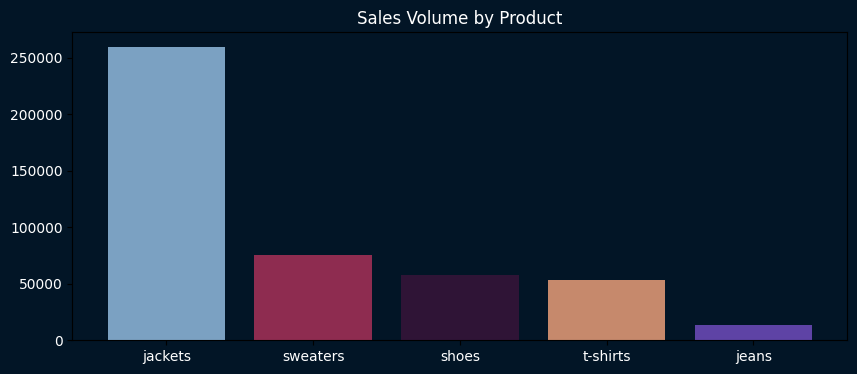

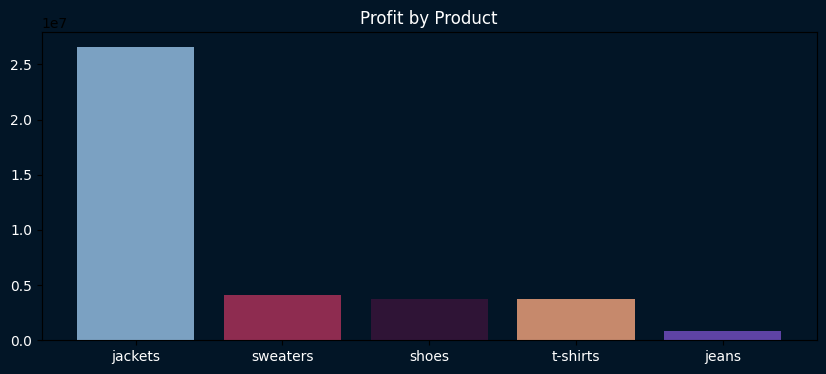

In [169]:
#Which products generate the highest sales volume?
#set unique color to each product
product = sorted(df_sales["terms"].unique())
palette = sns.color_palette("twilight",len(product))
product_color= dict(zip(product,palette))


product_sales = df_sales.groupby("terms")["sales_volume"].sum().reset_index()

#print(product_sales)

product_sales= product_sales.sort_values("sales_volume", ascending=False)

colors = [product_color[p] for p in product_sales["terms"]]

plt.figure(figsize=(10,4) , facecolor = '#021526')
plt.bar(product_sales["terms"],product_sales["sales_volume"], color= colors)
plt.title("Sales Volume by Product", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

#Which products generate the highest profit?

df_sales["profit"] = df_sales["sales_volume"]*df_sales["price"]
profit_byproduct = df_sales.groupby("terms")["profit"].sum().reset_index()
profit_byproduct=profit_byproduct.sort_values("profit",ascending=False)

plt.figure(figsize=(10,4), facecolor="#021526")
plt.bar(profit_byproduct["terms"],profit_byproduct["profit"],color=colors)
plt.title("Profit by Product",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

Jackets account for the majority of sales and profit, representing 56% of total volume of sales. Sweaters follow with 16.4%, while jeans contribute the least, at just 2.9%. This indicates that jackets are the key revenue driver, whereas jeans have limited market traction.

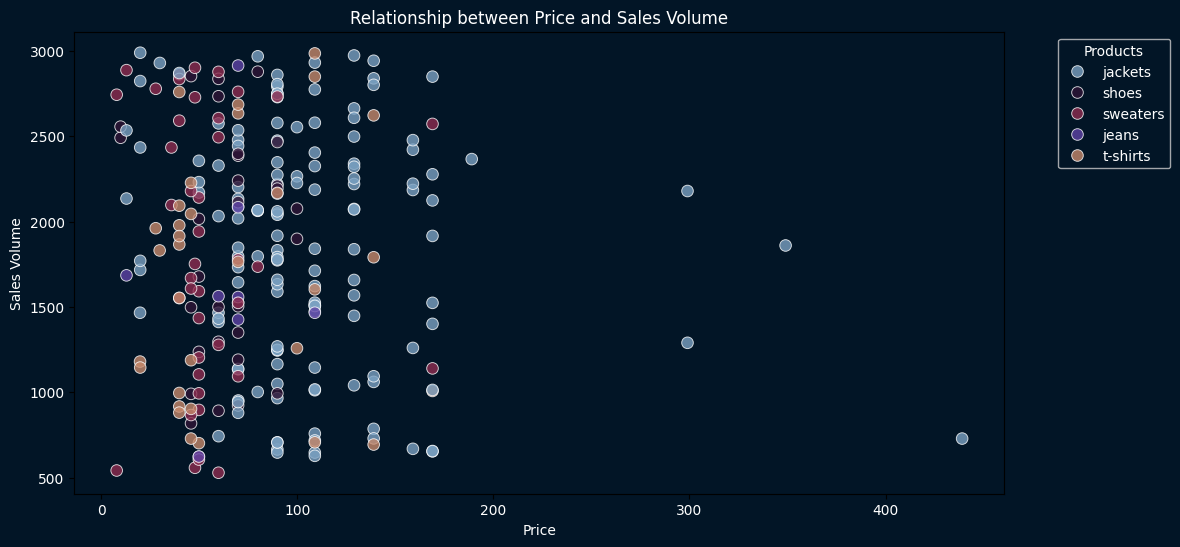

In [102]:
#how does that correlate with price ?
#sns.scatterplot(data=df_sales, x="price", y= "sales_volume", hue="terms")
plt.figure(figsize=(12,6), facecolor="#021526")
sns.scatterplot(
    data=df_sales, 
    x="price", 
    y="sales_volume", 
    hue="terms", 
    alpha=0.8,
    palette= product_color,
    s=70)
plt.title("Relationship between Price and Sales Volume", color="white")
plt.xlabel("Price", color="white")
plt.ylabel("Sales Volume", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
legend = plt.legend(facecolor= "#021526",title="Products", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.setp(legend.get_texts(), color="white")       # texte blanc
plt.setp(legend.get_title(), color="white")       # titre légende blanc
plt.show()

The analysis shows that lower-priced products drive the highest sales volumes, while higher-priced items sell in smaller quantities.

  - T-shirts, jeans, and sweaters perform strongly at affordable price points, indicating that customers are price-sensitive in these categories.

  - Jackets and shoes sell across a wider price range but still achieve higher volumes in the lower to mid-price tiers.

  - Overall, there is a clear negative relationship between price and sales volume, suggesting that pricing strategy is a key driver of demand across all product categories.

<function matplotlib.pyplot.show(close=None, block=None)>

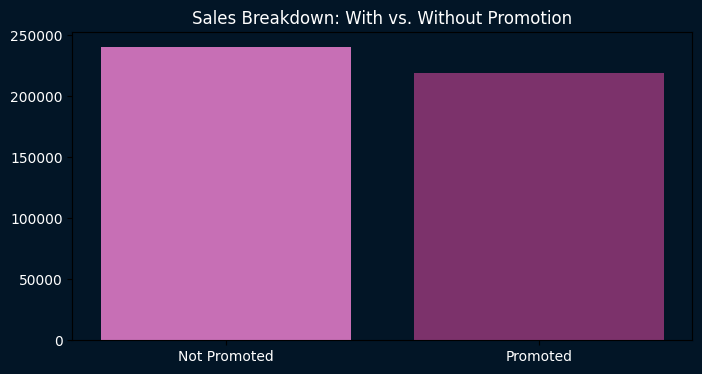

In [140]:
##how does that correlate with promotion ?
promotion_sales = df_sales.groupby("promotion")["sales_volume"].sum().reset_index()
promotion_sales= promotion_sales.sort_values("sales_volume",ascending=False)

plt.figure(figsize=(8,4),facecolor="#021526")
plt.bar(promotion_sales["promotion"],promotion_sales["sales_volume"], color= sns.color_palette("vanimo"))
plt.title("Sales Breakdown: With vs. Without Promotion", color="white")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show


Sales generated with promotions are lower compared to non-promoted sales, suggesting that promotions may not be the primary driver of demand. This indicates that customers are willing to purchase even without discounts, highlighting the strength of the brand and product appeal

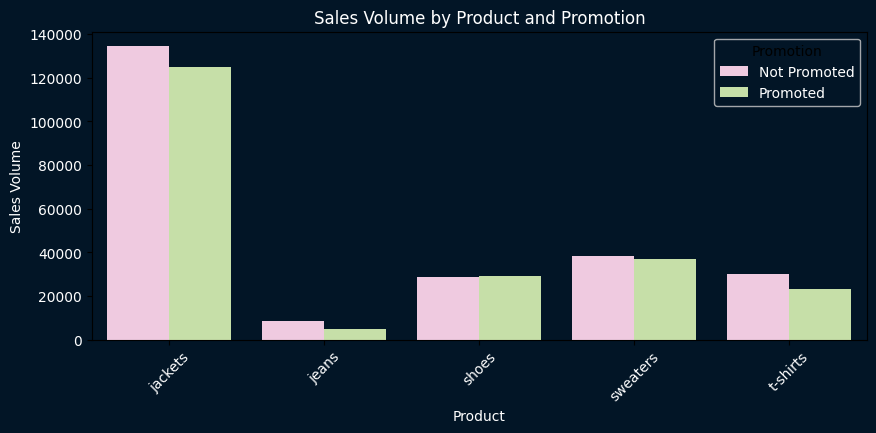

In [143]:
#we will go deep and see the number of sales by product promoted and no promoted 
promotion_sales_product = df_sales.groupby(["terms","promotion"])["sales_volume"].sum().reset_index()
#print(promotion_sales_product)

plt.figure(figsize=(10,4),facecolor="#021526")
sns.barplot(
           data= promotion_sales_product,
            x="terms",
            y="sales_volume",
            hue="promotion",
            palette= "PiYG")
plt.title("Sales Volume by Product and Promotion", color="white")
plt.xlabel("Product", color="white")
plt.ylabel("Sales Volume", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.legend(title="Promotion", facecolor="#021526", labelcolor="white")
plt.show()

The chart shows that overall, non-promoted products generate higher sales compared to promoted ones. However, an exception can be observed with shoes, where promoted sales slightly exceed non-promoted sales. This suggests that promotions may have an impact on specific categories like footwear, while for most other products, sales remain driven primarily by non-promoted items.

In [159]:
#promotion effectivveness 
promo_pivot = promotion_sales_product.pivot(index="terms", columns="promotion", values="sales_volume").fillna(0)
promo_pivot["Uplift (%)"] = ((promo_pivot["Promoted"] - promo_pivot["Not Promoted"]) / promo_pivot["Not Promoted"]) * 100 #colonne calculée
print(promo_pivot)


promotion  Not Promoted  Promoted  Uplift (%)
terms                                        
jackets          134416    125052   -6.966433
jeans              8611      4709  -45.314133
shoes             28560     29346    2.752101
sweaters          38461     36781   -4.368061
t-shirts          30264     23373  -22.769627


Overall, promotions do not seem effective for most categories and, in some cases, may even reduce sales. The only exception is shoes, where promotions had a modest positive effect. This suggests that promotion strategies should be re-evaluated:

  -Limit discounts for jackets, sweaters, and T-shirts.

  -Consider targeted promotions for shoes where customers respond positively.

  -Explore alternative marketing strategies (bundling, loyalty offers, new arrivals) instead of price reductions for the other categories.

<function matplotlib.pyplot.show(close=None, block=None)>

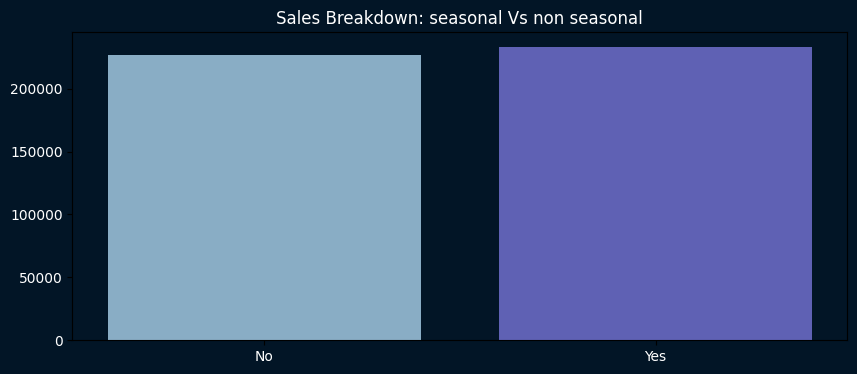

In [149]:
#Seasonalité
sales_seasonal = df_sales.groupby("seasonal")["sales_volume"].sum().reset_index()
#print(sales_seasonal)

plt.figure(figsize=(10,4),facecolor="#021526")
plt.bar(sales_seasonal["seasonal"],sales_seasonal["sales_volume"],color= sns.color_palette("twilight"))
plt.title("Sales Breakdown: seasonal Vs non seasonal",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show

Seasonal sales are only slightly higher than non-seasonal sales, suggesting that seasonality has a limited impact on overall performance. This indicates that demand is relatively stable throughout the year, and factors other than seasonality may play a more significant role in driving sales.


  seasonal     terms  sales_volume
5      Yes   jackets        135321
0       No   jackets        124147
8      Yes  sweaters         54972
2       No     shoes         39803
4       No  t-shirts         32500
9      Yes  t-shirts         21137
3       No  sweaters         20270
7      Yes     shoes         18103
1       No     jeans          9672
6      Yes     jeans          3648


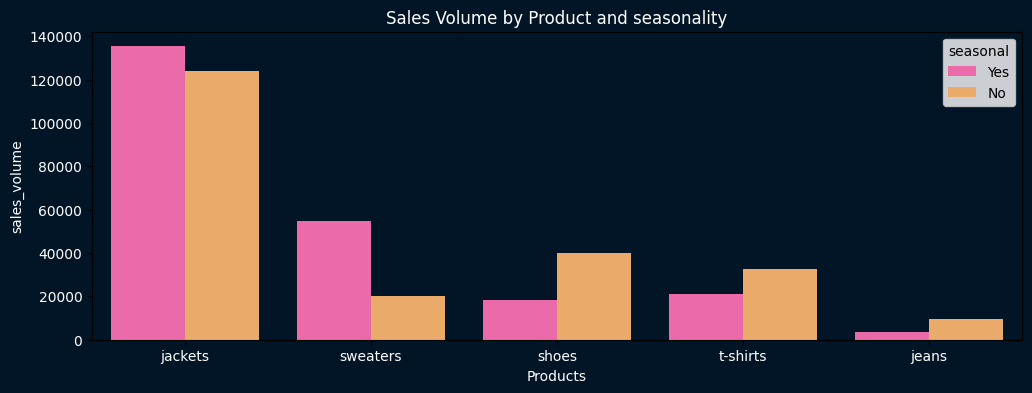

In [155]:
#seasonalité by product
sales_season_product = df_sales.groupby(["seasonal","terms"])["sales_volume"].sum().reset_index()
sales_season_product = sales_season_product.sort_values("sales_volume",ascending=False)
print(sales_season_product)

plt.figure(figsize=(12,4),facecolor="#021526")
sns.barplot(data=sales_season_product,
            x="terms",
            y="sales_volume",
            hue="seasonal",
            palette= "spring")
plt.title("Sales Volume by Product and seasonality",color="white")
plt.xlabel("Products",color="white")
plt.ylabel("sales_volume",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()


Breaking down sales by seasonality for each product reveals important differences. Jackets show higher seasonal sales, indicating stronger demand during specific periods. Sweaters are even more dependent on seasonality, with seasonal sales significantly exceeding non-seasonal ones. In contrast, other products generate more sales outside seasonal periods, suggesting their demand is less influenced by seasonality.

  section  sales_volume
0     MAN        396199
1   WOMAN         63374


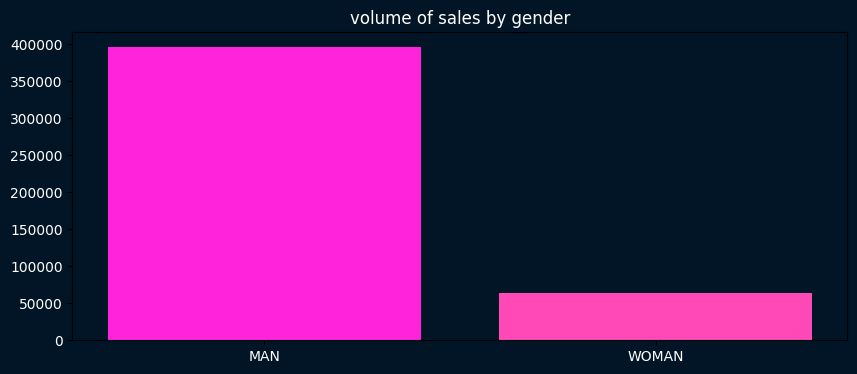

In [179]:
#analysis by genre 
#sales contribution by gender 
sales_bygender = df_sales.groupby("section")["sales_volume"].sum().reset_index()
print(sales_bygender)

plt.figure(figsize=(10,4),facecolor="#021526")
plt.bar(sales_bygender["section"],sales_bygender["sales_volume"],color= sns.color_palette("spring"))
plt.title("volume of sales by gender",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

Men’s section dominates the sales, contributing 396,199 units (≈86%) of the total volume.

Women’s section is significantly smaller, with 63,374 units (≈14%).

This suggests that:

  - The men’s segment is the key revenue driver → most of the sales are concentrated here.

  - The women’s segment is under-developed. This could represent an opportunity if Zara invests in targeted promotions, product variety, or marketing campaigns toward women.

  - For strategic decisions, maintaining strength in men’s products is essential, but growth potential lies in the women’s market.

In [182]:
#average price by  gender 
average_price = df_sales.groupby("section")["price"].mean().reset_index()
print(average_price)
median_price = df_sales.groupby("section")["price"].median().reset_index()
print(median_price)

  section      price
0     MAN  91.824587
1   WOMAN  50.525882
  section  price
0     MAN   89.9
1   WOMAN   48.9


The data shows that the average price of men’s products (≈ $91.8) is almost twice as high as women’s products (≈ $50.5). Despite higher prices, men’s products generate significantly more sales volume. This suggests that the demand for men’s items is strong and not highly price-sensitive.

  section     terms  sales_volume
0     MAN   jackets        259468
1     MAN     jeans         13320
2     MAN     shoes         57906
3     MAN  sweaters         11868
4     MAN  t-shirts         53637
5   WOMAN  sweaters         63374


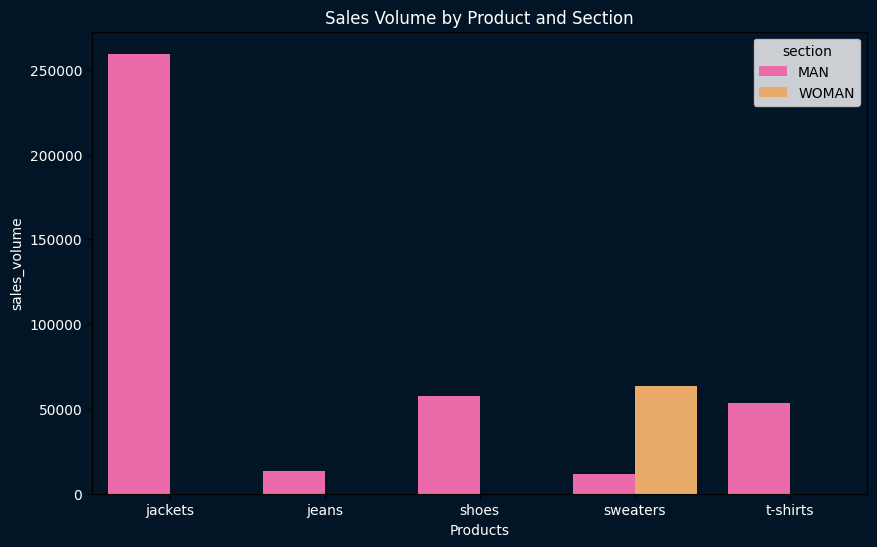

In [187]:
#sales by gender and product

# Sales volume and average price per product + section
product_section = df_sales.groupby(["section", "terms"])["sales_volume"].sum().reset_index()
print(product_section)

plt.figure(figsize=(10,6),facecolor="#021526")
sns.barplot(data=product_section,
            x="terms",
            y="sales_volume",
            hue="section",
            palette="spring")
plt.title("Sales Volume by Product and Section",color="white")
plt.xlabel("Products",color="white")
plt.ylabel("sales_volume",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()



Men’s jackets are the core growth driver — any promotion or assortment expansion here has high ROI.

Women’s products are underserved. Expanding women’s categories (e.g., jackets, shoes) could diversify revenue sources.

Men’s jeans and sweaters are weak performers. Either reposition with better pricing/promotion or reallocate shelf space to stronger categories.